In [1]:
import sys
sys.path.append("../../bas-apres")
import apres as ap

In [ ]:
# find current directory
import os
print(os.path.dirname(os.path.realpath(__file__)))

NameError: name '__file__' is not defined

In [2]:
%load_ext autoreload
%autoreload 2 
import sys
sys.path.append("../../../xapres/")
import xapres as xa
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
sys.path.append("/Users/jkingslake/Documents/science/ApRES/bas-apres")
import apres as ap
#from apres import ApRESFile

NameError: name 'pwd' is not defined

In [80]:
xapres_Loaded = xa.load.generate_xarray('../../data/sample/multi-burst-dat-file/', computeProfiles=False)

100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

new header cleaning


In [113]:
# extract filename from path
import os
filename = os.path.basename(f.path)

filename

'DATA2022-05-22-1939.DAT'

In [8]:
def values_to_arrays(d):
    keys_to_skip = ['Time stamp']

    for key, value in d.items():
        if key in keys_to_skip:
            continue
        try:
            d[key] = np.fromstring(value, dtype='float64')
        except:
            try:    
                d[key] = np.fromstring(value, sep=',')
            except:
                pass
            pass
    return d

In [99]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'

with ap.ApRESFile(dat_file) as f: 
    f.read()
    
#for i, b in enumerate(f.bursts):
#    f.bursts[i].header = values_to_arrays(b.header)

burst = f.bursts[0]
burst.header


{'Time stamp': '2022-05-22 19:40:20',
 'RMB_Issue': '2c',
 'VAB_Issue': 'C',
 'SW_Issue': '103.1',
 'Venom_Issue': '20180522',
 'Alternate': '0',
 'MonoTx': '1',
 'MonoRx': '1',
 'NSubBursts': '20',
 'NData': '0',
 'NSAFData': '0',
 'Triples': '0,0,0,0,0,0,0,0,0,0,0,0',
 'Average': '0',
 'RepSecs': '900',
 'CheckEthernet': '1',
 'N_ADC_SAMPLES': '40001',
 'MAX_DATA_FILE_LENGTH': '300000000',
 'MAX_SAF_FILE_LENGTH': '0',
 'ANTENNA_SELECT': '0',
 'nAttenuators': '2',
 'Housekeeping': '1',
 'GPSon': '60',
 'SyncGPS': '1',
 'Iridium': '0',
 'WATCHDOG_TASK_SECS': '3600',
 'IntervalMode': '0',
 'InterChirpDelay': '50',
 'Attenuator1': '10,20,30,30',
 'AFGain': '-14,-14,-14,-14',
 'TxAnt': '1,0,0,0,0,0,0,0',
 'RxAnt': '1,0,0,0,0,0,0,0',
 'maxDepthToGraph': '900',
 'SleepMode': '0',
 'LogOn': '1',
 'Reg00': '"00000008"',
 'Reg01': '"000C0820"',
 'Reg02': '"0D1F41C8"',
 'Reg0B': '"6666666633333333"',
 'Reg0C': '"000053E3000053E3"',
 'Reg0D': '"186A186A"',
 'Reg0E': '"08B5000000000000"',
 'Sampl

In [19]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'

with ap.ApRESFile(dat_file) as f: 
    f.read()

s = f   
s.f = f
header = xa.load.from_dats.header_cleaning(s)   
header

{'Time stamp': '2022-05-22 22:39:52',
 'RMB_Issue': '2c',
 'VAB_Issue': 'C',
 'SW_Issue': 103.1,
 'Venom_Issue': 20180522,
 'Alternate': 0,
 'MonoTx': 1,
 'MonoRx': 1,
 'NSubBursts': 20,
 'NData': 0,
 'NSAFData': 0,
 'Triples': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'Average': 0,
 'RepSecs': 900,
 'CheckEthernet': 1,
 'N_ADC_SAMPLES': 40001,
 'MAX_DATA_FILE_LENGTH': 300000000,
 'MAX_SAF_FILE_LENGTH': 0,
 'ANTENNA_SELECT': 0,
 'nAttenuators': 2,
 'Housekeeping': 1,
 'GPSon': 60,
 'SyncGPS': 1,
 'Iridium': 0,
 'WATCHDOG_TASK_SECS': 3600,
 'IntervalMode': 0,
 'InterChirpDelay': 50,
 'Attenuator1': [10.0, 20.0, 30.0, 30.0],
 'AFGain': [-14, -14, -14, -14],
 'TxAnt': [1, 0, 0, 0, 0, 0, 0, 0],
 'RxAnt': [1, 0, 0, 0, 0, 0, 0, 0],
 'maxDepthToGraph': 900.0,
 'SleepMode': 0,
 'LogOn': 1,
 'Reg00': '"00000008"',
 'Reg01': '"000C0820"',
 'Reg02': '"0D1F41C8"',
 'Reg0B': '"6666666633333333"',
 'Reg0C': '"000053E3000053E3"',
 'Reg0D': '"186A186A"',
 'Reg0E': '"08B50000000000

In [ ]:
## create mock header
obj = object()
obj.header

#header = xa.load.from_dats.header_cleaning(s)   


In [46]:
b = burst.data
b = b[None,]
print(b.shape)
b = np.expand_dims(b, axis=(0,1))
b.shape

(1, 20, 40001, 2)


(1, 1, 1, 20, 40001, 2)

In [ ]:
np.fromstring(burst.header['AFGain'], sep=',')

array([-14., -14., -14., -14.])

In [141]:
burst.header['Attenuator1']

array([10., 20., 30., 30.])

In [109]:
fs = xa.load.from_dats()
fs.load_all(attended=True, 
            directory=["../../data/sample/polarmetric", "../../data/sample/polarmetric"], 
            polarmetric=True, 
            computeProfiles=True)

assert len(fs.data.waypoint) == 2
assert all(fs.data.isel(waypoint=0).filename.values == fs.data.isel(waypoint=1).filename.values)
fs.data

<xarray.Dataset>
Dimensions:          (orientation: 4, waypoint: 2, chirp_num: 100,
                      chirp_time: 40001, attenuator_setting_pair: 1,
                      profile_range: 39999)
Coordinates:
    time             (orientation, waypoint) datetime64[ns] 2023-01-05T03:07:...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    filename         (orientation, waypoint) <U26 'DATA2023-01-05-0307-HH.DAT...
    AFGain           (attenuator_setting_pair) int64 4
    attenuator       (attenuator_setting_pair) float64 22.0
  * orientation      (orientation) <U2 'HH' 'HV' 'VH' 'VV'
  * waypoint         (waypoint) int64 1 2
  * profile_range    (profile_range) float64 0.0 0.2103 ... 8.411e+03 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (orientation, waypoint, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (orientation, waypoint) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    longitude        (orientation, waypoint) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    battery_voltage  (orientation, waypoint) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    temperature_1    (orientation, waypoint) float64 -9.07 -9.07 ... 2.492 2.492
    temperature_2    (orientation, waypoint) float64 -10.38 -10.38 ... 4.93 4.93
    profile          (orientation, waypoint, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000, 'f_2'...
    processing:  Created on 2024-11-27 13:00:02.285535

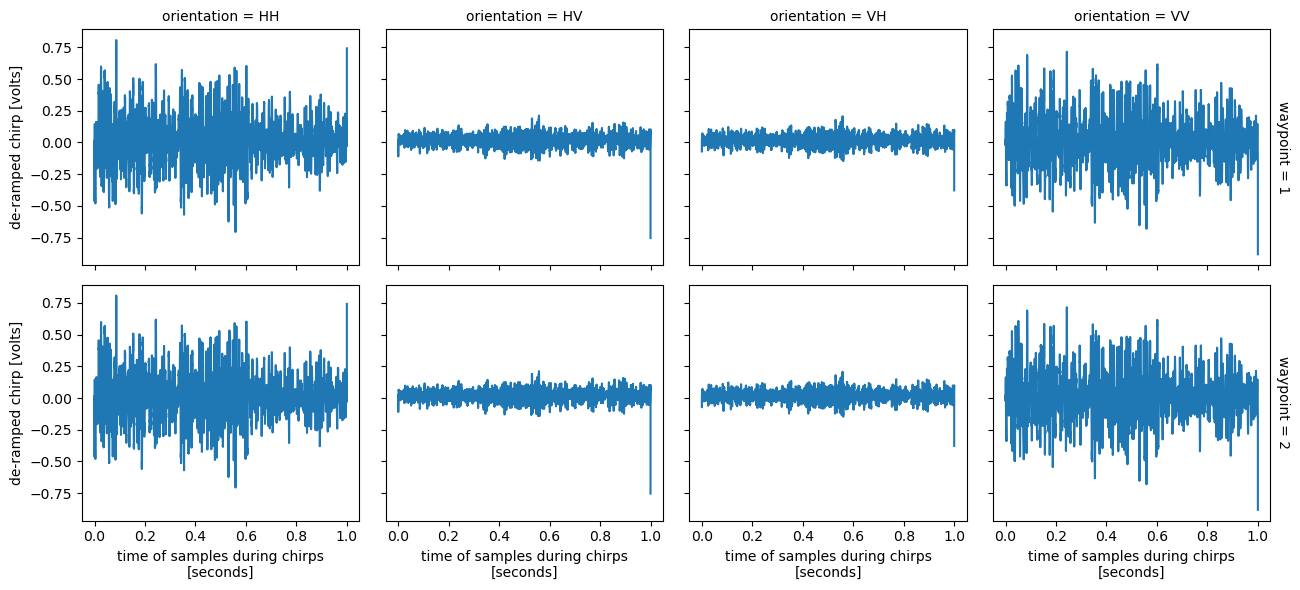

In [79]:
fs.data.chirp.isel( chirp_num=0).plot(col = 'orientation', row = 'waypoint')

In [8]:
fd = xa.load.from_dats()
isempty(fd.list_files())

NameError: name 'isempty' is not defined

In [17]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
fd = xa.load.from_dats(loglevel='DEBUG')


fd.load_all()

DEBUG    15:05:55 	 load.py @function _setup_logging line 626 - Stream logging level set to DEBUG
DEBUG    15:05:55 	 load.py @function _setup_logging line 627 - Add console handler to logger
DEBUG    15:05:55 	 load.py @function _setup_logging line 640 - File logging level set to DEBUG
DEBUG    15:05:55 	 load.py @function is_this_a_remote_load line 648 - remote_load set to False
DEBUG    15:05:55 	 load.py @function load_all line 243 - Start call to load_all with remote_load = False, directory = None, file_numbers_to_process = None, file_names_to_process = None, bursts_to_process = All, attended = False
DEBUG    15:05:55 	 load.py @function list_files line 120 - Find all the dat files in the directory None
DEBUG    15:05:55 	 load.py @function is_this_a_remote_load line 648 - remote_load set to False
DEBUG    15:05:55 	 load.py @function list_files line 139 - Finish call to list_files. Found 0 files
DEBUG    15:05:55 	 load.py @function load_all line 253 - No dat files found. Returni

In [29]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
fd = xa.load.from_dats()
fd.load_all(attended=True, 
                directory=["../../data/sample/polarmetric/"], 
                polarmetric=True)

<xarray.Dataset>
Dimensions:          (orientation: 4, waypoint: 1, chirp_num: 100,
                      chirp_time: 40001, attenuator_setting_pair: 1,
                      profile_range: 39999)
Coordinates:
    time             (orientation, waypoint) datetime64[ns] 2023-01-05T03:07:...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    filename         (orientation, waypoint) <U26 'DATA2023-01-05-0307-HH.DAT...
    AFGain           (attenuator_setting_pair) int64 -4
    attenuator       (attenuator_setting_pair) float64 22.0
  * orientation      (orientation) <U2 'HH' 'HV' 'VH' 'VV'
  * waypoint         (waypoint) int64 1
  * profile_range    (profile_range) float64 0.0 0.2103 ... 8.411e+03 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (orientation, waypoint, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (orientation, waypoint) float64 0.0 0.0 0.0 0.0
    longitude        (orientation, waypoint) float64 0.0 0.0 0.0 0.0
    battery_voltage  (orientation, waypoint) float64 0.0 0.0 0.0 0.0
    temperature_1    (orientation, waypoint) float64 -9.07 -8.875 2.891 2.492
    temperature_2    (orientation, waypoint) float64 -10.38 -8.422 -0.172 4.93
    profile          (orientation, waypoint, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000, 'f_2'...
    processing:  Created on 2024-11-27 15:15:02.064152

In [33]:
fd = xa.load.from_dats()
fd.load_all(attended=True, 
                directory='../../data/sample/attended/', 
                polarmetric=False)

<xarray.Dataset>
Dimensions:          (orientation: 1, waypoint: 1, chirp_num: 100,
                      chirp_time: 40001, attenuator_setting_pair: 1,
                      profile_range: 39999)
Coordinates:
    time             (orientation, waypoint) datetime64[ns] 2023-01-05T03:16:15
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    filename         (orientation, waypoint) <U23 'DATA2023-01-05-0315.DAT'
    AFGain           (attenuator_setting_pair) int64 -4
    attenuator       (attenuator_setting_pair) float64 22.0
  * orientation      (orientation) <U1 ''
  * waypoint         (waypoint) int64 1
  * profile_range    (profile_range) float64 0.0 0.2103 ... 8.411e+03 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (orientation, waypoint, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (orientation, waypoint) float64 0.0
    longitude        (orientation, waypoint) float64 0.0
    battery_voltage  (orientation, waypoint) float64 0.0
    temperature_1    (orientation, waypoint) float64 2.891
    temperature_2    (orientation, waypoint) float64 -0.172
    profile          (orientation, waypoint, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000, 'f_2'...
    processing:  Created on 2024-11-27 15:16:56.230357

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/Users/jkingslake/Library/Jupyter/runtime/kernel-v3eafd9dcda6beaa456a0c87ad38cdf2521277c126.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
import unittest
directory='../../data/sample/polarmetric'
fs1 = xa.load.from_dats()
fs1.load_all(directory, file_numbers_to_process=[0,1])

fs2 = xa.load.from_dats()
fs2.load_all(directory, file_names_to_process = fs1.dat_filenames_to_process)

assert fs1.data.equals(fs2.data)

fs3 = xa.load.from_dats()
fs3.load_all(directory, file_numbers_to_process="All")
fs4 = xa.load.from_dats()
fs4.load_all(directory, file_names_to_process="All")

import pytest
with pytest.raises(ValueError):
    fs5 = xa.load.from_dats()
    fs5.load_all(directory, file_numbers_to_process="All", file_names_to_process = fs1.dat_filenames_to_process) 






100%|██████████| 4/4 [00:00<00:00, 71.54it/s]


In [50]:

directory='../../data/sample/multi-burst-dat-file'
fs4 = xa.load.from_dats()
fs4.load_all(directory, bursts_to_process='All')
fs4.load_all(directory, bursts_to_process=1)
fs4.load_all(directory, bursts_to_process=[1,2])
fs4.load_all(directory, bursts_to_process=[1,3, 20000])



100%|██████████| 1/1 [00:00<00:00, 11.94it/s]


100%|██████████| 1/1 [00:00<00:00, 51.90it/s]


100%|██████████| 1/1 [00:00<00:00, 43.73it/s]


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]


<xarray.Dataset>
Dimensions:          (time: 13, chirp_num: 20, chirp_time: 40001,
                      attenuator_setting_pair: 2, profile_range: 39999)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-22T19:40:20 ... 2022-05-22...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
    filename         (time) <U23 'DATA2022-05-22-1939.DAT' ... 'DATA2022-05-2...
    burst_number     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    AFGain           (attenuator_setting_pair) int64 -14 -14
    attenuator       (attenuator_setting_pair) float64 10.0 20.0
    orientation      (time) <U7 'unknown' 'unknown' ... 'unknown' 'unknown'
  * profile_range    (profile_range) float64 0.0 0.2103 ... 8.411e+03 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (time) float64 69.22 69.22 69.22 ... 69.22 69.22 69.22
    longitude        (time) float64 -51.12 -51.12 -51.12 ... -51.12 -51.12
    battery_voltage  (time) float64 12.33 12.48 12.51 12.56 ... 12.49 12.5 12.47
    temperature_1    (time) float64 4.383 7.32 7.32 5.75 ... 9.086 9.477 4.773
    temperature_2    (time) float64 5.195 1.469 5.0 3.82 ... 5.594 6.969 3.625
    profile          (time, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000.0, 'f_...
    processing:  Created on 2024-11-27 15:39:13.168189

In [25]:
ds = xa.load.generate_xarray('../../data/sample/thwaites/', computeProfiles=False)
ds

100%|██████████| 1/1 [00:00<00:00, 26.18it/s]


<xarray.Dataset>
Dimensions:          (time: 2, chirp_num: 100, chirp_time: 40001,
                      attenuator_setting_pair: 1)
Coordinates:
  * time             (time) datetime64[ns] 2023-02-12T04:37:04 2023-02-13T04:...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    filename         (time) <U23 'DATA2023-02-12-0437.DAT' 'DATA2023-02-12-04...
    burst_number     (time) int64 0 1
    AFGain           (attenuator_setting_pair) int64 -4
    attenuator       (attenuator_setting_pair) float64 22.0
    orientation      (time) <U7 'unknown' 'unknown'
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (time) float64 0.0 0.0
    longitude        (time) float64 0.0 0.0
    battery_voltage  (time) float64 12.39 12.39
    temperature_1    (time) float64 -18.55 -18.35
    temperature_2    (time) float64 -13.66 -13.85
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000, 'f_2'...
    processing:  Created on 2024-11-27 13:35:41.416125

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [ ]:
xapres_Loaded = xa.load.load_zarr('gs://ldeo-glaciology/apres/thwaites/continuous/ApRES_LTG/zarr/full.zarr') #


In [67]:
import os
cwd = os.getcwd()
cwd

'/Users/jkingslake/Documents/science/ApRES/xapres/notebooks/test_notes'

In [ ]:
directory='../../data/sample/single_dat_file/'
fs = xa.load.from_dats()
ds = fs.load_all(directory)
ds.profile.dB()


AttributeError: 'NoneType' object has no attribute 'profile'

In [52]:
directory='../../data/sample/single_dat_file/'
fs = xa.load.from_dats()
fs.load_all(directory)
fs.data.chirp.isel(chirp_num=0).sonify(save=True)
with pytest.raises(BaseException):
    fs.data.chirp.sonify()



100%|██████████| 1/1 [00:00<00:00, 55.03it/s]


In [81]:
directory='../../data/sample/single_dat_file/'

fs = xa.load.from_dats()
ds = fs.load_all(directory).chunk({'time': 1, 'profile_range': 1}).chirp.computeProfile()

100%|██████████| 1/1 [00:00<00:00, 44.61it/s]


In [71]:
fd = xa.load.from_dats(loglevel='DEBUG')
fd.load_all('data/sample/empty')

DEBUG    16:07:18 	 load.py @function _setup_logging line 626 - Stream logging level set to DEBUG
DEBUG    16:07:18 	 load.py @function _setup_logging line 627 - Add console handler to logger
DEBUG    16:07:18 	 load.py @function _setup_logging line 640 - File logging level set to DEBUG
DEBUG    16:07:18 	 load.py @function is_this_a_remote_load line 648 - remote_load set to False
DEBUG    16:07:18 	 load.py @function load_all line 247 - Start call to load_all with remote_load = False, directory = data/sample/empty, file_numbers_to_process = None, file_names_to_process = None, bursts_to_process = All, attended = False
DEBUG    16:07:18 	 load.py @function list_files line 120 - Find all the dat files in the directory data/sample/empty
DEBUG    16:07:18 	 load.py @function is_this_a_remote_load line 648 - remote_load set to False
DEBUG    16:07:18 	 load.py @function list_files line 139 - Finish call to list_files. Found 0 files
DEBUG    16:07:18 	 load.py @function load_all line 257 - N

In [78]:
np.array(100.0)

array(100.)

In [ ]:
directory='../../data/sample/single_dat_file/'
fs = xa.load.from_dats()
ds = fs.load_all(directory)
p1 = ds._replace(attrs={}).addProfileToDs().profile
p2 = ds.addProfileToDs().profile
assert p1.equals(p2)

100%|██████████| 1/1 [00:00<00:00, 31.85it/s]


hello


In [117]:
ds['chirp_time'] = np.linspace(0,1,ds.chirp_time.values.size).astype('timedelta64')
t = ds.chirp_time.values
import matplotlib.pyplot as plt
plt.plot(t)

TypeError: timedelta64 values must have a unit specified

In [ ]:
from_zarr = xa.load.load_zarr() 
from_zarr.isel(chirp_num=0, time = 100, attenuator_setting_pair = 0 ).chirp.sonify()

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 11723,
                      chirp_time: 40001, chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-05-22T19:40:20 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>

In [113]:
from_zarr.isel(chirp_num=0, time = 100, attenuator_setting_pair = 0 ).chirp.sonify()

0.125 0.9875


In [114]:
t = from_zarr.chirp_time.values
t

array([         0,      25000,      50000, ...,  999950000,  999975000,
       1000000000], dtype='timedelta64[ns]')

In [ ]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
fd = xa.load.from_dats()
fd.load_all(attended=True, 
                directory=["../../data/sample/polarmetric/"], 
                polarmetric=True)

<xarray.Dataset>
Dimensions:          (orientation: 4, waypoint: 1, chirp_num: 100,
                      chirp_time: 40001, attenuator_setting_pair: 1,
                      profile_range: 39999)
Coordinates:
    time             (orientation, waypoint) datetime64[ns] 2023-01-05T03:07:...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    filename         (orientation, waypoint) <U26 'DATA2023-01-05-0307-HH.DAT...
    AFGain           (attenuator_setting_pair) int64 -4
    attenuator       (attenuator_setting_pair) float64 22.0
  * orientation      (orientation) <U2 'HH' 'HV' 'VH' 'VV'
  * waypoint         (waypoint) int64 1
  * profile_range    (profile_range) float64 0.0 0.2103 ... 8.411e+03 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (orientation, waypoint, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (orientation, waypoint) float64 0.0 0.0 0.0 0.0
    longitude        (orientation, waypoint) float64 0.0 0.0 0.0 0.0
    battery_voltage  (orientation, waypoint) float64 0.0 0.0 0.0 0.0
    temperature_1    (orientation, waypoint) float64 -9.07 -8.875 2.891 2.492
    temperature_2    (orientation, waypoint) float64 -10.38 -8.422 -0.172 4.93
    profile          (orientation, waypoint, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': 200000000, 'f_2'...
    processing:  Created on 2024-11-27 15:15:02.064152

In [ ]:
ds = xr.Dataset()
ds._replace(attrs={})

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [ ]:
if len(tmp) == 2:
                if tmp[0].lower() == "rxant" or \
                   tmp[0].lower() == "txant" or \
                   tmp[0].lower() == "afgain":
                   Burst.Header[tmp[0]] = \
                        [int(x) for x in tmp[1].split(',') if x]
                        
                elif tmp[0].lower() == "triples" or \
                     tmp[0].lower() == "attenuator1" or \
                     tmp[0].lower() == "batterycheck":
                     Burst.Header[tmp[0]] = \
                        [float(x) for x in tmp[1].split(',') if x]
                                      
                elif tmp[0].lower() == "latitude" or \
                     tmp[0].lower() == "longitude" or \
                     tmp[0].lower() == "temp1" or \
                     tmp[0].lower() == "temp2" or \
                     tmp[0].lower() == "batteryvoltage" or \
                     tmp[0].lower() == "tstepup" or \
                     tmp[0].lower() == "tstepdn" or \
                     tmp[0].lower() == "fsc" or \
                     tmp[0].lower() == "sw_issue" or \
                     tmp[0].lower() == "er_ice" or \
                     tmp[0].lower() == "position_depth_conversion" or \
                     tmp[0].lower() == "maxdepthtograph":
                    Burst.Header[tmp[0]] = float(tmp[1])
                    
                elif tmp[0].lower() == "rmb_issue" or \
                     tmp[0].lower() == "vab_issue" or \
                     tmp[0].lower() == "reg00" or \
                     tmp[0].lower() == "reg01" or \
                     tmp[0].lower() == "reg02" or \
                     tmp[0].lower() == "reg03" or \
                     tmp[0].lower() == "reg0b" or \
                     tmp[0].lower() == "reg0c" or \
                     tmp[0].lower() == "reg0d" or \
                     tmp[0].lower() == "reg0e":
                    Burst.Header[tmp[0]] = tmp[1]
                elif tmp[0].lower() == "time stamp":
                    Burst.Header[tmp[0]] = tmp[1]
                else:
                    Burst.Header[tmp[0]] = int(tmp[1])
                    